# Program to predict whether a person has diabetes or not

## Ensemble model :
#### Logistic Regression
#### SVC
#### Decision Tree
#### Random Forest
#### Maybe: SGD, KNN, Naive Bayes, K-Means

In [128]:
#!pip install pydot
#!pip install graphviz
#!pip install pydotplus

In [121]:
#Importing the necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import keras as keras
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import davies_bouldin_score

from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Feature selection using correlation

In [33]:
print (pearsonr(df.iloc[:, 0], df.iloc[:, 1])) 
print (pearsonr(df.iloc[:, 0], df.iloc[:, 2]))
print (pearsonr(df.iloc[:, 0], df.iloc[:, 3]))
print (pearsonr(df.iloc[:, 0], df.iloc[:, 4]))
print (pearsonr(df.iloc[:, 0], df.iloc[:, 5]))
print (pearsonr(df.iloc[:, 0], df.iloc[:, 6]))
print (pearsonr(df.iloc[:, 0], df.iloc[:, 7]))    #Might drop 7

(0.12945867149927248, 0.00032194913520398817)
(0.1412819774071399, 8.541845507573449e-05)
(-0.08167177444900717, 0.02360794865655158)
(-0.07353461435162811, 0.041620944686355896)
(0.017683090727830635, 0.6246376459591252)
(-0.033522672962613104, 0.35353460198756165)
(0.544341228402339, 1.8628128328627385e-60)


In [14]:
print (pearsonr(df.iloc[:, 1], df.iloc[:, 2]))
print (pearsonr(df.iloc[:, 1], df.iloc[:, 3]))
print (pearsonr(df.iloc[:, 1], df.iloc[:, 4]))
print (pearsonr(df.iloc[:, 1], df.iloc[:, 5]))
print (pearsonr(df.iloc[:, 1], df.iloc[:, 6]))
print (pearsonr(df.iloc[:, 1], df.iloc[:, 7]))

(0.15258958656866445, 2.1695071530224762e-05)
(0.05732789073817704, 0.11241414950019196)
(0.33135710992020906, 3.882623944270335e-21)
(0.22107106945898294, 5.891412527082051e-10)
(0.1373372998283707, 0.00013458781437151353)
(0.26351431982433354, 1.1501118165159675e-13)


In [16]:
print (pearsonr(df.iloc[:, 2], df.iloc[:, 3]))
print (pearsonr(df.iloc[:, 2], df.iloc[:, 4]))
print (pearsonr(df.iloc[:, 2], df.iloc[:, 5]))
print (pearsonr(df.iloc[:, 2], df.iloc[:, 6]))
print (pearsonr(df.iloc[:, 2], df.iloc[:, 7]))

(0.20737053840307085, 6.606687460516121e-09)
(0.088933378373193, 0.013683499093529235)
(0.28180528884991063, 1.7378883832365869e-15)
(0.041264947930098585, 0.2533743720191266)
(0.23952794642136352, 1.7520512137100313e-11)


In [17]:
print (pearsonr(df.iloc[:, 3], df.iloc[:, 4]))
print (pearsonr(df.iloc[:, 3], df.iloc[:, 5]))
print (pearsonr(df.iloc[:, 3], df.iloc[:, 6]))
print (pearsonr(df.iloc[:, 3], df.iloc[:, 7]))

(0.43678257012001304, 4.0435774320524095e-37)
(0.3925732041590383, 1.0548761717287775e-29)
(0.18392757295416323, 2.8561794700255984e-07)
(-0.11397026236774166, 0.0015582784662133164)


In [18]:
print (pearsonr(df.iloc[:, 4], df.iloc[:, 5]))
print (pearsonr(df.iloc[:, 4], df.iloc[:, 6]))
print (pearsonr(df.iloc[:, 4], df.iloc[:, 7]))

(0.197859056493101, 3.2196953891521244e-08)
(0.18507092916809909, 2.4022640739413525e-07)
(-0.04216295473537686, 0.24318215223443468)


In [19]:
print (pearsonr(df.iloc[:, 5], df.iloc[:, 6]))
print (pearsonr(df.iloc[:, 5], df.iloc[:, 7]))

(0.14064695254510517, 9.197970126955033e-05)
(0.03624187009229414, 0.3158329898723243)


In [20]:
print (pearsonr(df.iloc[:, 6], df.iloc[:, 7]))
#Retaining 7 as it doesn't have high correlation with any other feature

(0.03356131243480553, 0.35297973366675434)


#### Some visualisation

Zeroes (Not diabetic):  500
Ones (diabetic):  268


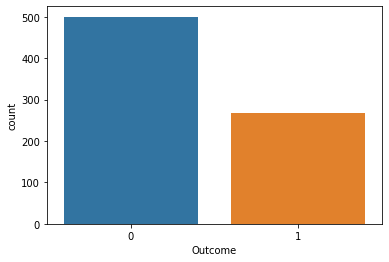

In [8]:
Fig1 = sns.countplot(df['Outcome'], label="Count")
Zeroes, Ones = df['Outcome'].value_counts()
print('Zeroes (Not diabetic): ', Zeroes)
print('Ones (diabetic): ', Ones)

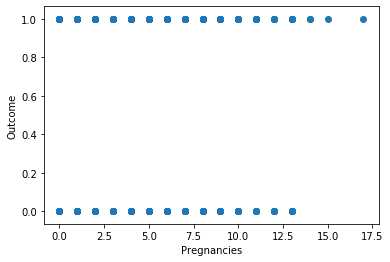

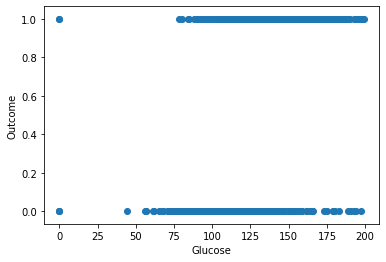

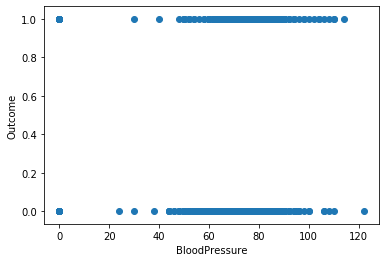

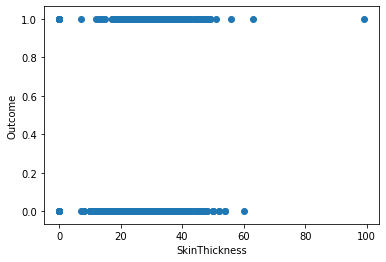

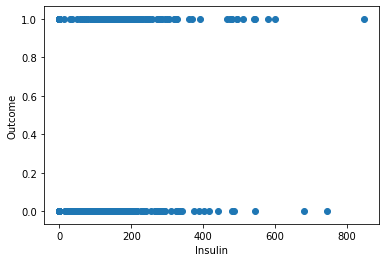

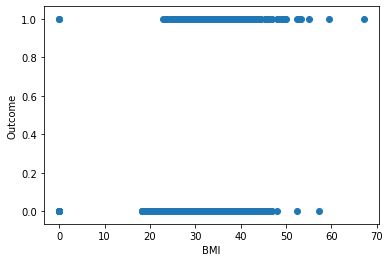

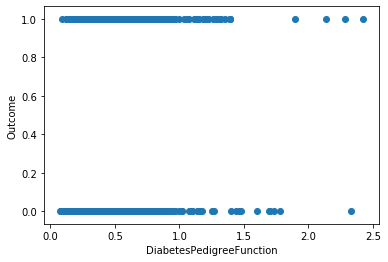

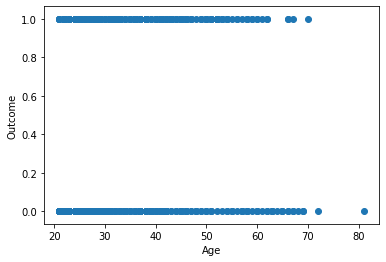

In [31]:
#Exploring clusters in the original (unprocessed) data

df_col=list(df.columns)

for i in range(len(df_col)-1):
    plt.scatter(df[df_col[i]], df[df_col[-1]])
    plt.xlabel(df_col[i])
    plt.ylabel(df_col[-1])
    plt.show()

#### Pre-Processing Data

In [79]:
#Scaling
stdscale = StandardScaler()
minmax = MinMaxScaler()

for i in range(len(df_col)-1):
    df[[df_col[i]]] = minmax.fit_transform(df[[df_col[i]]])
    
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [80]:
#As all columns are being kept, we can now partition the data into X and Y
X = df.iloc[:, 0:8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [81]:
Y = pd.DataFrame(df.iloc[:, 8])    #Else it'd have become a Series
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [82]:
#Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

print (X_train)
print (Y_train)
print (X_test)
print (Y_test)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
62      0.294118  0.221106       0.508197       0.000000  0.000000  0.372578   
281     0.588235  0.648241       0.622951       0.282828  0.144208  0.535022   
199     0.235294  0.743719       0.491803       0.272727  0.375887  0.460507   
744     0.764706  0.768844       0.721311       0.373737  0.165485  0.605067   
293     0.058824  0.643216       0.393443       0.454545  0.229314  0.603577   
..           ...       ...            ...            ...       ...       ...   
73      0.235294  0.648241       0.704918       0.202020  0.319149  0.523100   
400     0.235294  0.477387       0.524590       0.000000  0.000000  0.476900   
118     0.235294  0.487437       0.491803       0.232323  0.000000  0.420268   
701     0.352941  0.628141       0.639344       0.313131  0.000000  0.411326   
206     0.470588  0.984925       0.622951       0.292929  0.330969  0.558867   

     DiabetesPedigreeFunction       Age

#### Building and testing individual models

LOGISTIC REGRESSION:
[[135  25]
 [ 26  45]]
Accuracy: 77.92207792207793 %

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       160
           1       0.64      0.63      0.64        71

    accuracy                           0.78       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.78      0.78      0.78       231



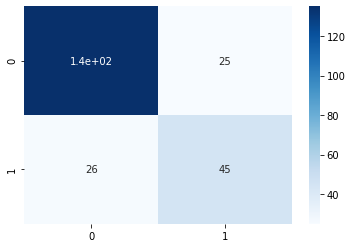

In [124]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred1 = logreg.predict(X_test)

print ("LOGISTIC REGRESSION:")
cm1 = confusion_matrix(Y_test, Y_pred1)
print (cm1)
print ("Accuracy:", logreg.score(X_test, Y_test)*100, "%")

#Lost about 0.8% accuracy from StandardScaler to MinMaxScaler

sn.heatmap(cm1, cmap ='Blues', annot=True)
print ()
print (classification_report(Y_test, Y_pred1))

SVM CLASSIFICATION:
[[136  24]
 [ 25  46]]
Accuracy: 78.78787878787878 %

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       160
           1       0.66      0.65      0.65        71

    accuracy                           0.79       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.79      0.79      0.79       231



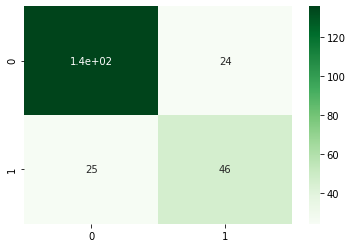

In [125]:
#Support Vector Machine Classification

svc = svm.SVC(gamma="auto", kernel="linear")
svc.fit(X_train, Y_train)

Y_pred2 = svc.predict(X_test)

print ("SVM CLASSIFICATION:")
cm2 = confusion_matrix(Y_test, Y_pred2)
print (cm2)
print ("Accuracy:", svc.score(X_test, Y_test)*100, "%")

#Gained about 0.5% accuracy from StandardScaler to MinMaxScaler

sn.heatmap(cm2, cmap ='Greens', annot=True)
print ()
print (classification_report(Y_test, Y_pred2))

DECISION TREE CLASSIFICATION:
[[117  43]
 [ 24  47]]
Accuracy: 70.995670995671 %

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       160
           1       0.52      0.66      0.58        71

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.68       231
weighted avg       0.74      0.71      0.72       231



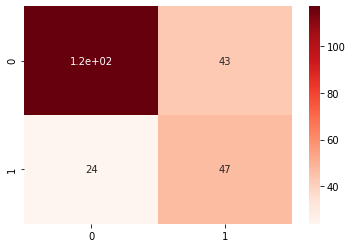

In [126]:
#Decision Tree Classification

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

Y_pred3 = dt.predict(X_test)

print ("DECISION TREE CLASSIFICATION:")
cm3 = confusion_matrix(Y_test, Y_pred3)
print (cm3)
print ("Accuracy:", dt.score(X_test, Y_test)*100, "%")

#Gained about 0.9% accuracy from StandardScaler to MinMaxScaler

sn.heatmap(cm3, cmap ='Reds', annot=True)
print ()
print (classification_report(Y_test, Y_pred3))

RANDOM FOREST CLASSIFICATION:
[[130  30]
 [ 22  49]]
Accuracy: 77.48917748917748 %

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       160
           1       0.62      0.69      0.65        71

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.78      0.77      0.78       231



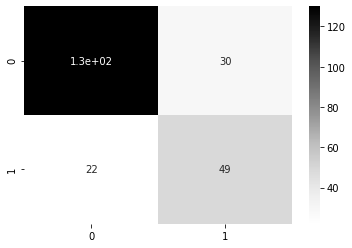

In [127]:
#Random Forest Classification

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

Y_pred4 = rf.predict(X_test)

print ("RANDOM FOREST CLASSIFICATION:")
cm4 = confusion_matrix(Y_test, Y_pred4)
print (cm4)
print ("Accuracy:", rf.score(X_test, Y_test)*100, "%")

#Lost about 1.3% accuracy from StandardScaler to MinMaxScaler

sn.heatmap(cm4, cmap ='Greys', annot=True)
print ()
print (classification_report(Y_test, Y_pred4))